<a href="https://colab.research.google.com/github/sopranomax/DataScienceClasses/blob/main/Alzheimers_MMacy_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Open Access Series of Imaging Studies (OASIS)
Open Access Series of Imaging Studies (OASIS) makes neuroimaging datasets freely available to the scientific community to facilitate discoveries in basic and clinical neuroscience. 
#### Longitudinal Dataset 

Data Source: https://www.oasis-brains.org/,     
https://central.xnat.org/app/template/XDATScreen_report_xnat_projectData.vm/search_element/xnat:projectData/search_field/xnat:projectData.ID/search_value/CENTRAL_OASIS_LONG

MRI Data in Nondemented and Demented Older Adults: This set consists of a longitudinal collection of 150 subjects aged 60 to 96. Each subject was scanned on two or more visits, separated by at least one year for a total of 373 imaging sessions. For each subject, 3 or 4 individual T1-weighted MRI scans obtained in single scan sessions are included. The subjects are all right-handed and include both men and women. 72 of the subjects were characterized as nondemented throughout the study. 64 of the included subjects were characterized as demented at the time of their initial visits and remained so for subsequent scans, including 51 individuals with mild to moderate Alzheimer’s disease. Another 14 subjects were characterized as nondemented at the time of their initial visit and were subsequently characterized as demented at a later visit.^1^

| COL      | Description                         | Type         |
|----------|-------------------------------------|--------------|
| Group    | Dementia Classification             | Categorical  |
| Visit    | Visit number in study               | Discrete     |
| MR Delay | Number of days between visits       | Discrete     | 
| M/F      | Gender                              | Categorical  |
| Hand     | all subjects are right handed       | Constant = R |
| Age      | Age in years                        | Discrete     |
| EDUC     | Years of Education                  | Discrete     |
| SES      | Socioeconomic Status                | Categorical  |  
| MMSE     | Mini Mental State Examination       | Discrete     |
| CDR      | Clinical Dementia Rating            | Discrete     |
| eTIV     | Estimated Total Intracranial Volume | Continuous   |
| nWBV     | Normalized Whole Brain Volume       | Continuous   |
| ASF      | Atlas Scaling Factor                | Continuous   |

**Socioeconomic status (SES)** as assessed by the Hollingshead Index of Social Position and classified into categories from 1 (highest) to 5 (lowest).

**Mini-Mental State Exam (MMSE)**

The Mini-Mental State Exam (MMSE) a.k.a the Folstein Test is a 30-point test used to measure thinking ability (or “cognitive impairment”). It is the most widely used test for assessing dementia.^3^

The test measures the following:  
* orientation to time and place (knowing where you are, and the season or day of the week)  
* short-term memory (recall)  
* attention and ability to solve problems (like spelling a simple word backwards)  
* language (identifying common objects by name)  
* comprehension and motor skills (drawing a slightly complicated shape like two pentagons intersecting)  


| Score  | Level of Dementia |
|--------|-------------------|
|24 - 30 | Normal cognition; no dementia |
|19 – 23 | Mild dementia |
|10 – 18 | Moderate dementia |
|9 or less | Severe dementia |

**Clinical Dementia Rating (CDR)**

The Clinical Dementia Rating (CDR) is a 5-point scale used to characterize six domains of cognitive and functional performance applicable to Alzheimer disease and related dementias: Memory, Orientation, Judgment & Problem Solving, Community Affairs, Home & Hobbies, and Personal Care. The necessary information to make each rating is obtained through a semi-structured interview of the patient and a reliable informant or collateral source (e.g., family member).^4^ 

| Score  | Description               |
|--------|---------------------------|
|    0   |        Normal             |
|    0.5 | Very Mild Dementia        | 
|    1   | Mild Dementia             |
|    2   | Moderate Dementia         |
|    3   | Severe Dementia           |

In [ ]:
## Read the Alzheimer's longitudinal data file
dfl = pd.read_csv('/content/oasis_alzheimers_longitudinal.csv')

# look at the longitudinal dataset
dfl.info()
dfl.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [ ]:
#check logitudinal data for nulls
dfl.isna().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [ ]:
#impute values for nulls in longitudinal data
dfl["SES"].fillna(dfl["SES"].median(), inplace=True)
dfl["MMSE"].fillna(dfl["MMSE"].mean(), inplace=True)

# convert logistical education years to categorical 
dfl['Educ'] = pd.cut(dfl['EDUC'],[0,11,15,19,20,30],labels=[1,2,3,4,5])

dfl.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Educ
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883,2
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876,2
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,2.0,23.0,0.5,1678,0.736,1.046,2
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,2.0,28.0,0.5,1738,0.713,1.010,2
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,2.0,22.0,0.5,1698,0.701,1.034,2


### Cross Sectional Dataset 

Data Source: https://www.oasis-brains.org/files/oasis_cross-sectional.csv

MRI Data in Young, Middle Aged, Nondemented and Demented Older Adults: This set consists of a cross-sectional collection of 416 subjects aged 18 to 96. For each subject, 3 or 4 individual T1-weighted MRI scans obtained in single scan sessions are included. The subjects are all right-handed and include both men and women. 100 of the included subjects over the age of 60 have been clinically diagnosed with very mild to moderate Alzheimer’s disease (AD). Additionally, a reliability data set is included containing 20 nondemented subjects imaged on a subsequent visit within 90 days of their initial session.^2^


| COL      | Description                         | Type         |
|----------|-------------------------------------|--------------|
| M/F      | Gender                              | Categorical  |
| Hand     | all subjects are right handed       | Constant = R |
| Age      | Age in years                        | Discrete     |
| Educ     | Education level on a 5 point scale  | Categorical  |
| SES      | Socioeconomic Status                | Categorical  |  
| MMSE     | Mini Mental State Examination       | Discrete     |
| CDR      | Clinical Dementia Rating            | Discrete     |
| eTIV     | Estimated Total Intracranial Volume | Continuous   |
| nWBV     | Normalized Whole Brain Volume       | Continuous   |
| ASF      | Atlas Scaling Factor                | Continuous   |
| Delay    | Number of days between visits       | Discrete     | 

**Education Level**

Education codes correspond to the following levels of education: 

| Code | Level Description  |
|------|--------------------|
| 1    | less than high school grad. |
| 2    | high school graduate |
| 3    | some college       |
| 4    | college graduate   |
| 5    | beyond college     | 

In [ ]:
## Read the Alzheimer's cross sectional data file
dfc = pd.read_csv('/content/oasis_alzheimers_cross-sectional.csv')

# look at the cross sectional dataset
dfc.info()
dfc.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      436 non-null    object 
 1   M/F     436 non-null    object 
 2   Hand    436 non-null    object 
 3   Age     436 non-null    int64  
 4   Educ    235 non-null    float64
 5   SES     216 non-null    float64
 6   MMSE    235 non-null    float64
 7   CDR     235 non-null    float64
 8   eTIV    436 non-null    int64  
 9   nWBV    436 non-null    float64
 10  ASF     436 non-null    float64
 11  Delay   20 non-null     float64
dtypes: float64(7), int64(2), object(3)
memory usage: 41.0+ KB


,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN


In [ ]:
#check cross sectional data for nulls
dfc.isna().sum()

ID         0
M/F        0
Hand       0
Age        0
Educ     201
SES      220
MMSE     201
CDR      201
eTIV       0
nWBV       0
ASF        0
Delay    416
dtype: int64

In [ ]:
#impute values for nulls in cross sectional data

# all of the subjects w/ CDR and MMSE NA's are controls
dfc['CDR'].fillna(0, inplace=True)
dfc["MMSE"].fillna(dfc.loc[dfc['CDR'] == 0, 'MMSE' ].median(), inplace=True)

# assign education levels randomly by age range
dfc.loc[dfc['Educ'].isna(), 'Educ' ] = np.random.randint(1, high=6, size=dfc['Educ'].isna().sum())
dfc.loc[dfc['Age'] < 24, 'Educ' ] = np.random.randint(1, high=4, size=len(dfc.loc[dfc['Age'] < 24, 'Educ' ]))
dfc.loc[dfc['Age'] < 19, 'Educ' ] = np.random.randint(1, high=3, size=len(dfc.loc[dfc['Age'] < 19, 'Educ' ]))

dfc.loc[dfc['SES'].isna(), 'SES'] = np.random.randint(1, high=6, size=dfc['SES'].isna().sum())



In [ ]:
# combine the data
df = dfl
df = df.append(dfc)
# Drop unnecessary columns
for x in ['Subject ID', 'MRI ID', 'Visit', 'MR Delay', 
          'Hand', 'eTIV', 'ASF', 'EDUC', 'Delay']:
    df.drop(x, axis=1, inplace=True)
    
#look at summary statistics for the columns
df.head()
#df.describe()

,Group,M/F,Age,SES,MMSE,CDR,nWBV,Educ,ID
0,Nondemented,M,87,2.0,27.0,0.0,0.696,2.0,NaN
1,Nondemented,M,88,2.0,30.0,0.0,0.681,2.0,NaN
2,Demented,M,75,2.0,23.0,0.5,0.736,2.0,NaN
3,Demented,M,76,2.0,28.0,0.5,0.713,2.0,NaN
4,Demented,M,80,2.0,22.0,0.5,0.701,2.0,NaN


In [ ]:
#check for duplicate rows
df.duplicated().sum()

0

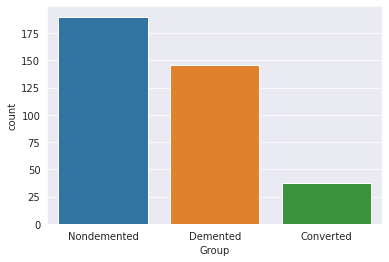

In [ ]:
#Converted group has developed dementia during the longitudinal study
sns.set_style("darkgrid")
sns.countplot(x='Group', data=df, palette=sns.color_palette("tab10"))

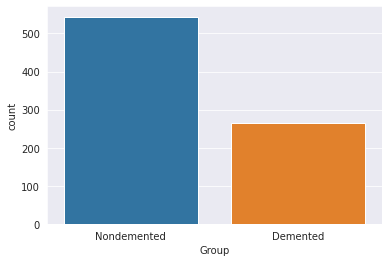

In [ ]:
#Replace Converted with Nondemented where CDR = 0 and with Demented otherwise

df['Group'] = np.where((df.CDR == 0), 'Nondemented', df.Group)
df['Group'] = np.where((df.Group == 'Converted'), 'Demented', df.Group)
df['Group'].fillna('Demented', inplace=True)

sns.countplot(x='Group', data=df, palette=sns.color_palette("tab10"))

               M    F
Demented     135  130
Nondemented  193  351


Text(0.5, 1.0, 'Dementia by Gender')

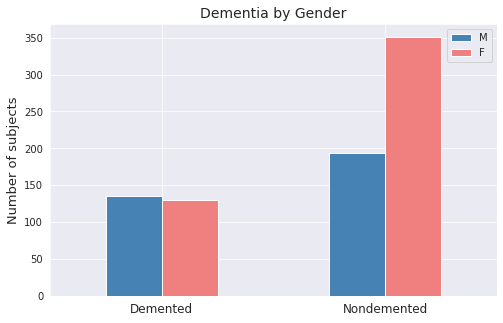

In [ ]:
Demented = df[df['Group']=='Demented']['M/F'].value_counts()
Nondemented = df[df['Group']=='Nondemented']['M/F'].value_counts()
df_bar = pd.DataFrame([Demented,Nondemented])
df_bar.index = ['Demented','Nondemented']
df_bar.plot(kind='bar', figsize=(8,5), color=['#4682B4', '#F08080'])
print(df_bar)
plt.xticks(rotation=0,fontsize=12)
plt.ylabel('Number of subjects',fontsize=13)
plt.legend()
plt.title('Dementia by Gender',fontsize=14)

             1.0  2.0  3.0  4.0  5.0
Demented      61   69   60   66    9
Nondemented  119  174  108  106   37


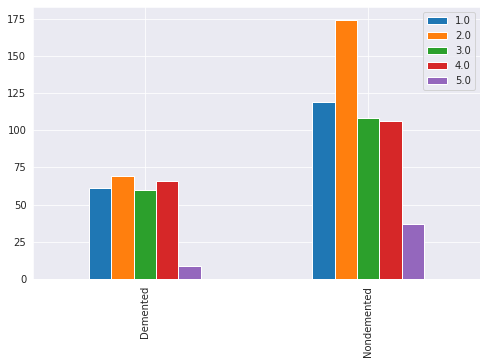

In [ ]:
# SES  and  Group ( Female=0, Male=1)
Demented = df[df['Group']=='Demented']['SES'].value_counts()
Nondemented = df[df['Group']=='Nondemented']['SES'].value_counts()
df_bar = pd.DataFrame([Demented,Nondemented])
df_bar.index = ['Demented','Nondemented']
df_bar.plot(kind='bar', figsize=(8,5))
print(df_bar)

<Figure size 576x360 with 0 Axes>

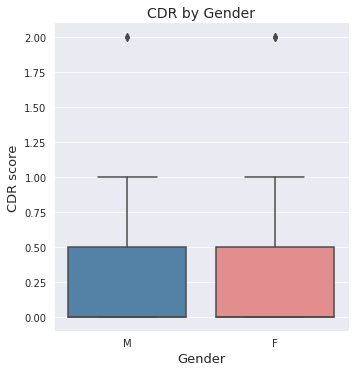

In [ ]:
plt.figure(figsize=(8,5))
sns.catplot(x='M/F', y='CDR', kind = 'box', data=df, palette=['#4682B4', '#F08080'])
plt.set_yticks = ([0.0, 0.5, 1.0, 1.5, 2.0])
plt.title('CDR by Gender',fontsize=14)
plt.xlabel('Gender',fontsize=13)
plt.ylabel('CDR score',fontsize=13)
plt.show()

<Figure size 720x360 with 0 Axes>

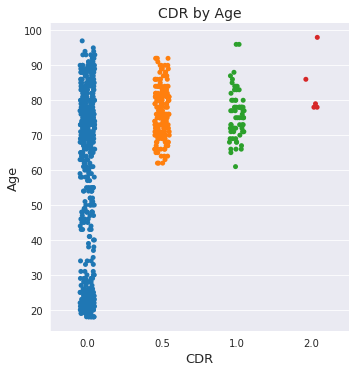

In [ ]:
plt.figure(figsize=(10,5))
sns.catplot(x='CDR', y='Age', data=df)
plt.title('CDR by Age',fontsize=14)
plt.xlabel('CDR',fontsize=13)
plt.ylabel('Age',fontsize=13)
plt.show()

In [ ]:
#convert the charecter data into numeric
df['Group'] = df['Group'].replace(["Demented", "Nondemented"],[0,1])
df['M/F'] = df['M/F'].replace(['F','M'], [0,1])

df.head()

,Group,M/F,Age,SES,MMSE,CDR,nWBV,Educ,ID
0,1,1,87,2.0,27.0,0.0,0.696,2.0,NaN
1,1,1,88,2.0,30.0,0.0,0.681,2.0,NaN
2,0,1,75,2.0,23.0,0.5,0.736,2.0,NaN
3,0,1,76,2.0,28.0,0.5,0.713,2.0,NaN
4,0,1,80,2.0,22.0,0.5,0.701,2.0,NaN


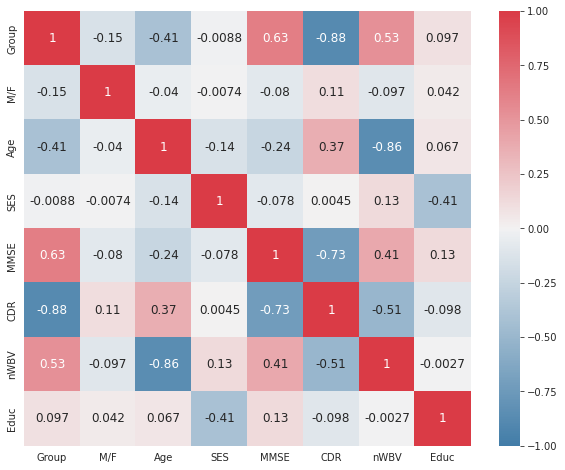

In [ ]:
corr = df.corr()
_ , ax = plt.subplots( figsize =( 10 , 8 ) )
cmap = sns.diverging_palette( 240 , 10 , as_cmap = True )
_ = sns.heatmap(corr, cmap=cmap, vmin=-1, vmax=1,
                annot = True, annot_kws = { 'fontsize' : 12 })

In [ ]:
from sklearn.model_selection import train_test_split

#feature_col_names = ["M/F", "Age", "Educ", "SES", "MMSE", "nWBV"]
feature_col_names = ["M/F", "Age", "Educ", "SES", "nWBV"]
predicted_class_names = ['Group']

X = df[feature_col_names].values
y = df[predicted_class_names].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=99)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import  ConfusionMatrixDisplay, accuracy_score

cmap = sns.color_palette("YlGnBu", as_cmap=True)
def report_performance(model):

    model_test = model.predict(X_test)

    print("\n\nConfusion Matrix:")
    print("{0}".format(confusion_matrix(y_test, model_test)))
    print("\n\nClassification Report: ")
    print(classification_report(y_test, model_test))
    
    #plot_confusion_matrix(y_test, model_test)
    classNames = ['Nondemented','Demented']
    cm = confusion_matrix(y_test, model_test)
    plt.figure(1)
    plt.clf()
   
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                                  display_labels=classNames)
    disp.plot(cmap=cmap)
    plt.title('\nConfusion Matrix', fontsize=14)
    plt.ylabel('True')
    plt.xlabel('Predicted')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    plt.show()

    feat_importances = pd.Series(model.feature_importances_, index=feature_col_names)
    feat_importances.plot(kind='barh')
    plt.title("\nFeature Importance", fontsize=14)
    plt.show()

In [ ]:
total_accuracy = {}
def accuracy(model):
    pred = model.predict(X_test)
    accu = accuracy_score(y_test,pred)
    print("\nAccuracy Of the Model: ",accu,"\n\n")
    total_accuracy[str((str(model).split('(')[0]))] = accu

### DecisionTreeClassifier



Confusion Matrix:
[[38 21]
 [11 92]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.78      0.64      0.70        59
           1       0.81      0.89      0.85       103

    accuracy                           0.80       162
   macro avg       0.79      0.77      0.78       162
weighted avg       0.80      0.80      0.80       162



<Figure size 432x288 with 0 Axes>

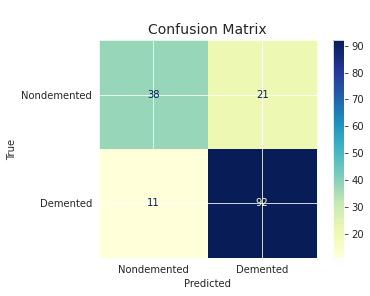

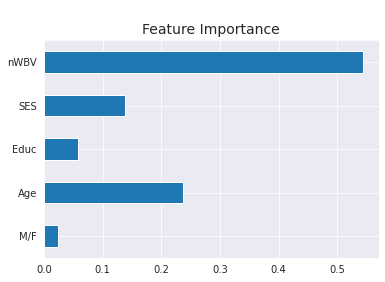


Accuracy Of the Model:  0.8024691358024691 




In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf_dtc = DecisionTreeClassifier(criterion='entropy', random_state=99)
clf_dtc.fit(X_train, y_train)
report_performance(clf_dtc) 
accuracy(clf_dtc)


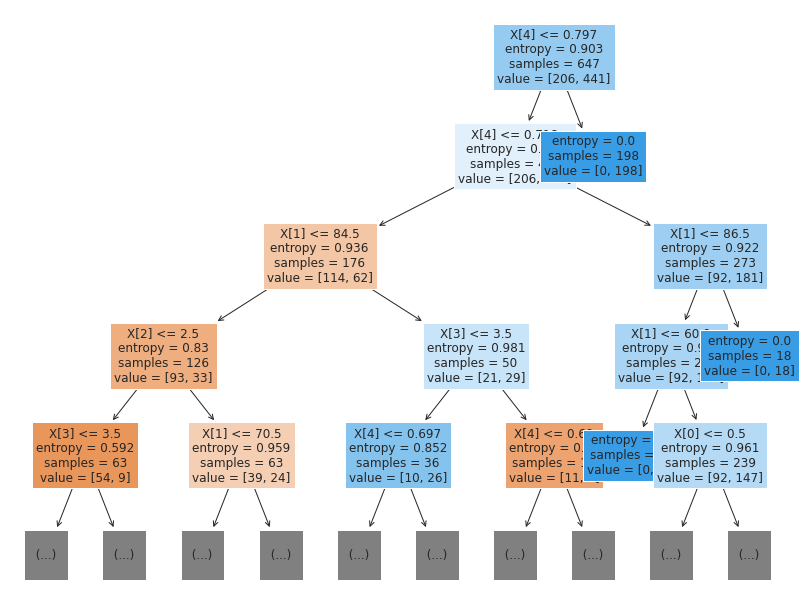

In [ ]:
from sklearn import tree

fig, ax = plt.subplots(figsize=(14, 11))
tree.plot_tree(decision_tree=clf_dtc, max_depth= 4, fontsize=12, filled=True);

### RandomForestClassifier 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """




Confusion Matrix:
[[33 26]
 [ 7 96]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.56      0.67        59
           1       0.79      0.93      0.85       103

    accuracy                           0.80       162
   macro avg       0.81      0.75      0.76       162
weighted avg       0.80      0.80      0.79       162



<Figure size 432x288 with 0 Axes>

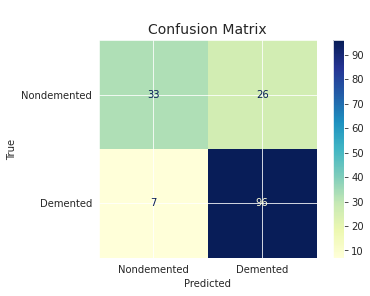

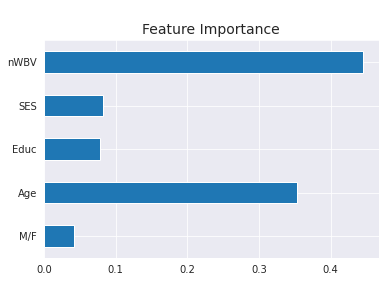


Accuracy Of the Model:  0.7962962962962963 




In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(criterion='gini',max_depth=8,max_features='auto',n_estimators=200)

rfc.fit(X_train, y_train)
report_performance(rfc) 
accuracy(rfc)


## ExtraTreesClassifier



Confusion Matrix:
[[41 18]
 [ 6 97]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.69      0.77        59
           1       0.84      0.94      0.89       103

    accuracy                           0.85       162
   macro avg       0.86      0.82      0.83       162
weighted avg       0.85      0.85      0.85       162



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


<Figure size 432x288 with 0 Axes>

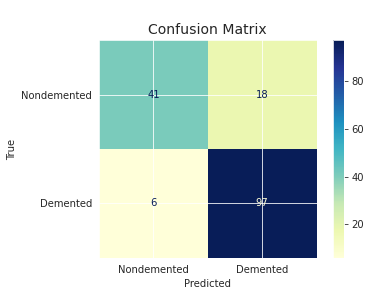

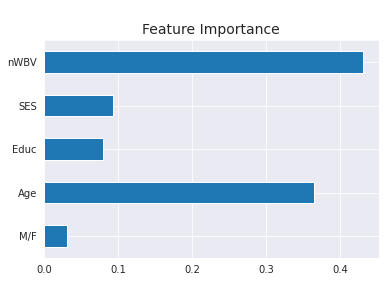


Accuracy Of the Model:  0.8518518518518519 




In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

clf_xts = ExtraTreesClassifier()
clf_xts.fit(X_train, y_train)
report_performance(clf_xts) 
accuracy(clf_xts)


## GradientBoostClassifier



Confusion Matrix:
[[34 25]
 [12 91]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.74      0.58      0.65        59
           1       0.78      0.88      0.83       103

    accuracy                           0.77       162
   macro avg       0.76      0.73      0.74       162
weighted avg       0.77      0.77      0.76       162



/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Figure size 432x288 with 0 Axes>

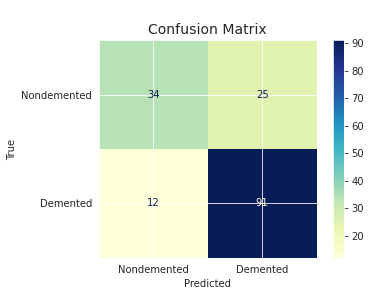

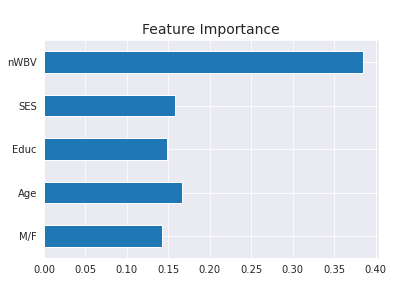


Accuracy Of the Model:  0.7716049382716049 




In [ ]:
import xgboost as xgb

xg_cl = xgb.XGBClassifier(objective='binary:logistic', max_depth=10, n_estimators=20, seed=99) 
xg_cl.fit(X_train, y_train)
report_performance(xg_cl) 
accuracy(xg_cl)



## Model Comparison

The ExtraTreesClassifier has the best accuracy score of 0.852.  All of the models identify nWBV as the most important feature in classification, and age as the second most important feature. However the XGBClassifier, which has the lowest accuracy score, gives age a lower importance percentage than the other models.

In [ ]:
for name, score in sorted(total_accuracy.items(), key=lambda x: x[1], reverse=True):
    print('{:>22}:\t {}'.format(name, round(score, 3)))


  ExtraTreesClassifier:	 0.852
DecisionTreeClassifier:	 0.802
RandomForestClassifier:	 0.796
         XGBClassifier:	 0.772


Text(0, 0.5, 'Accuracy')

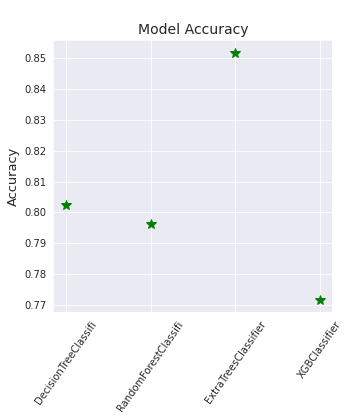

In [ ]:
data = total_accuracy.values()
labels = total_accuracy.keys()

plt.figure(figsize=(5,5))
plt.plot([i for i, e in enumerate(data)], list(data), 'g*', markersize=10)  
plt.title("\nModel Accuracy",fontsize = 14)
plt.xticks([i for i, e in enumerate(labels)], [l[0:20] for l in labels])
plt.xticks(rotation = 55)
plt.ylabel('Accuracy',fontsize = 13)

## References

1. Open Access Series of Imaging Studies (OASIS): Longitudinal MRI Data in Nondemented and Demented Older Adults
Marcus, DS, Fotenos, AF, Csernansky, JG, Morris, JC, Buckner, RL, 2010. Journal of Cognitive Neuroscience, 22, 2677-2684. doi: 10.1162/jocn.2009.21407, https://doi.org/10.1162/jocn.2009.21407
2. OASIS: Cross-Sectional, https://doi.org/10.1162/jocn.2007.19.9.1498
3. Dementia Care Central, https://www.dementiacarecentral.com/mini-mental-state-exam/
4. Charles F. and Joanne Knight Alzheimer Disease Research Center (Knight ADRC), https://knightadrc.wustl.edu/cdr/cdr.htm